# FIUBA - 75.70 Sistemas de Programación no Convencional de Robots

# Trabajo Práctico Final

# 1er Cuatrimestre 2019

## Grupo 2

### Martin Stancanelli 95188
### Juan Manuel Lambre xxxxx

## Instalación de dependencias

In [51]:
!pip install tpot dask dask-ml gdown imbalanced-learn
# Download dataset
!gdown "https://drive.google.com/uc?id=1aLBisToSU8V5zexdSF2RQNYkNgsVbVqL"

Downloading...
From: https://drive.google.com/uc?id=1aLBisToSU8V5zexdSF2RQNYkNgsVbVqL
To: /content/train.csv
312MB [00:06, 48.3MB/s]


## Imports

In [0]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

## Lectura de datos


In [0]:
dataset = pd.read_csv("/content/train.csv")

X = dataset.drop(['target'], axis=1)
y = dataset.target

## Preparación de datos

### Balanceo de datos
 (Opcional) Si no se corre esta seccion se usa el set original desbalanceado

El set de datos esta desbalanceado, tiene mas elementos de la clase 0 que de la clase 1 (ratio 9:1). Se hace un undersampleo para quedarse con la misma cantidad de ambos que la cantidad de la clase minoritaria.

Class 0: 179902
Class 1: 20098
Proportion: 8.95 : 1


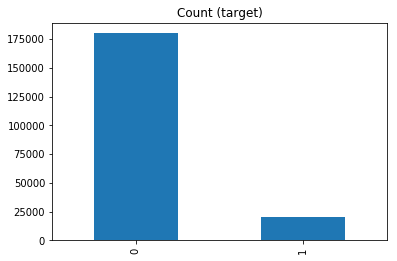

In [56]:
target_count = y.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_sample(X, y)

Class 0: 20098
Class 1: 20098
Proportion: 1.0 : 1


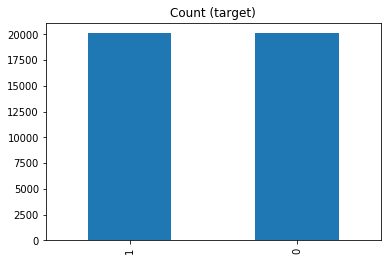

In [57]:
y_rus = pd.Series(y_rus)
target_count = y_rus.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)')

X = pd.DataFrame(X_rus)
y = pd.Series(y_rus)

### Split en test y train

Spliteamos el set de datos en test y train

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('Training features shape: ', X_train.shape)
X_train.head()

Training features shape:  (26931, 200)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
280,7.8148,4.6008,9.4967,10.5197,14.1635,-14.1218,5.8633,19.8497,3.0082,7.8386,-7.4221,4.7617,13.8235,9.0852,6.6927,14.8153,6.4565,-1.2017,23.4862,9.2962,9.9175,18.8896,6.8364,3.8860,14.8118,14.1320,-9.3073,-0.2216,4.1578,7.1430,1.3369,10.8411,-1.4278,14.8357,11.2193,-3.6313,5.6279,4.4468,14.4730,8.8108,...,33.7357,5.6546,5.3092,7.1646,-2.1726,27.5807,2.9166,-10.2725,5.9638,5.9123,1.3171,4.3072,33.6089,4.2991,11.7996,13.4567,-3.4646,8.6954,-2.2195,2.2100,-6.8720,11.7611,7.0483,19.7032,1.6257,-3.5659,12.7430,-2.3376,15.5103,1.7003,3.5859,8.4562,3.2351,5.9766,22.4363,-1.5726,4.2021,8.6310,15.1199,-19.9529
31204,18.0146,-1.1725,8.6087,9.5053,10.2132,-16.6269,3.9507,18.0059,-0.7748,6.2474,-15.0747,0.2701,14.1443,0.8969,5.0202,14.1834,9.2536,-1.8543,28.3041,12.3736,6.9322,22.5097,0.2635,2.6894,14.2578,13.5429,-0.7945,-0.8757,3.9205,6.9403,5.5764,8.3011,-0.3050,20.2161,11.3755,7.0504,0.2655,4.6785,4.2352,-0.8554,...,40.2523,6.0785,5.8768,0.6145,-13.3187,16.8685,3.0915,-2.0190,8.3571,5.7277,4.2280,-2.9997,12.1944,7.3264,26.4817,9.3478,6.1692,10.4133,4.5145,-1.4508,-4.4718,10.2250,-7.9353,12.7331,21.2057,-1.9988,10.1750,-9.8022,23.0528,3.1066,3.5360,3.7231,2.1258,-0.5019,20.8090,0.4871,-6.1677,6.9445,9.2170,12.3858
38221,8.9720,0.3903,16.9752,5.7244,11.8059,-10.7927,4.5772,16.7334,1.7540,6.9121,9.3505,-2.0185,13.7551,0.0361,9.8933,14.6772,6.7174,-12.3217,33.0949,14.2371,12.6726,37.0907,6.9599,2.0119,13.4688,13.6112,-0.0144,-1.4075,4.6956,5.1505,-1.4122,9.7078,-0.0573,15.2067,11.2717,5.7239,3.3716,8.3088,15.5478,1.1058,...,36.4954,5.6095,3.3184,7.9448,-3.2160,21.5215,2.9006,-2.4891,3.3909,5.9250,0.3092,6.8081,1.6851,-2.8164,19.8268,7.6707,-4.3235,10.9744,12.0134,1.6332,-4.0203,13.3265,13.5195,16.2401,32.5721,-0.3786,8.1631,-4.1880,19.9053,1.1652,-1.0402,11.6758,1.5963,3.3562,13.6890,-0.5392,3.3213,8.6637,16.6363,-8.9053
38942,12.0708,-6.0413,12.3131,7.5284,14.1100,-0.2843,5.5642,18.8531,-4.2373,8.7117,-7.6439,-8.1667,13.6884,10.0372,10.3507,14.8753,6.3133,-9.9294,17.3074,10.7330,15.3584,16.2072,5.8824,3.5638,13.6368,13.7367,-0.7196,0.9578,5.0285,3.1771,-19.5297,11.7934,2.1461,13.1625,12.3178,15.8069,6.3136,3.1099,7.9489,2.7000,...,34.4956,5.8394,7.7232,7.8853,6.4243,17.9363,3.8877,-12.1478,3.8059,6.1199,5.9321,5.1913,11.6703,-4.4604,19.8324,8.6927,7.5198,17.4580,-13.6621,3.7851,-12.3356,9.6452,-14.1199,2.8802,-5.8417,-6.9667,8.4735,-8.2663,12.6746,1.8514,-1.6545,8.0627,2.6815,2.9577,19.1547,2.6538,-7.5773,8.0585,15.6332,-7.0306
39760,10.4633,-6.0537,12.4037,6.8912,10.0445,-14.3166,5.0104,15.3514,0.8525,7.2200,8.3152,-16.0780,13.9142,8.9452,10.0167,14.4704,5.5105,-9.5542,12.6880,16.6956,14.7283,22.4844,8.4282,2.6913,11.2820,13.7691,-12.6383,-0.0459,6.1124,1.2437,-9.2761,7.5291,1.0800,18.2679,11.9577,-1.5764,4.5784,8.3907,12.3583,-1.2123,...,30.5952,5.6792,4.9534,1.1874,-3.1496,14.9289,2.6520,-8.1345,3.6297,6.3881,-0.4982,1.2038,7.4966,-9.5708,30.5269,14.6438,6.2592,14.6235,-2.8210,-3.1899,-2.7069,10.1439,-13.7825,5.0357,3.1461,-0.1682,7.6611,-2.6792,10.1502,0.7510,9.4837,14.0110,1.7368,-3.7322,15.9385,1.3178,7.8334,8.8443,16.2694,-3.7486


In [0]:
# Convert to numpy arrays
#X_train = np.array(X_train)[:2000]
X_train = np.array(X_train)
X_test = np.array(X_test)

# Sklearn wants the labels as one-dimensional vectors
#y_train = np.array(y_train).reshape((-1,))[:2000]
y_train = np.array(y_train).reshape((-1,))
y_test = np.array(y_test).reshape((-1,))

## Modelado

### Tpot

In [0]:
tpot = TPOTClassifier(scoring="accuracy",
                      generations=5,
                      cv=5,
                      max_time_mins=60,
                      n_jobs=-1,
                      random_state=42,
                      verbosity=2,
                      use_dask=True)

In [0]:
tpot.fit(X_train, y_train)

print("Accuracy: " + str(round(tpot.score(X_test, y_test),2)*100) + "%")

### RandomForest

In [48]:
clf = RandomForestClassifier(n_estimators=100,
                             random_state=42,
                             n_jobs=-1)

clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [50]:
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.7304937806257068
Recall: 0.737850890431633
Precision: 0.7267727070016352
F1: 0.7322699018947053


### NaiveBayes

In [61]:
gnb = GaussianNB()

gnb.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [63]:
y_pred = gnb.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("F1:", metrics.f1_score(y_test, y_pred))

Accuracy: 0.8044477949491142
Recall: 0.7986718985813462
Precision: 0.8076923076923077
F1: 0.8031567764455911
